# Classification
#### Assignment 24/06


In [1]:
import numpy as np
from numpy import linalg as LA


import scipy
from scipy import linalg
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
bd1_train = []  # vamos a transformar el archivo .csv en un np.array
with open("15 - Clasificacion 1-1.csv", "r") as f:
    for line in f:     # Phyton entiende que line es una fila
        currow = []
        entries = line.split(",") # entries es una list donde cada elemento es lo que esta entre ",". Pero sus elementos son
                                  # formato string. Hay que pasarlo a float
        for entry in entries:
            currow.append(float(entry))  # transforma la string en float
        bd1_train.append(currow)  # bd1_train no es aun un numpy array, es una lista, es mas eficiente hacer esto y al final 
                               # transformarlo en un numpy array.
bd1_train = np.array(bd1_train)  # transforma la lista matrix en un numpy array
print(bd1_train.shape)

(6, 3)


In [3]:
bd1_train

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [2., 0., 1.],
       [1., 1., 1.],
       [0., 2., 1.]])

In [5]:
select01 = np.array([[1,0],[0,1],[0,0]])
select2 = np.array([[0],[0],[1]])

In [6]:
X_tr = bd1_train.dot(select01)
print(X_tr.shape)
print(X_tr)
y_tr = bd1_train.dot(select2)
print(y_tr.shape)
print(y_tr)

(6, 2)
[[0. 0.]
 [1. 0.]
 [0. 1.]
 [2. 0.]
 [1. 1.]
 [0. 2.]]
(6, 1)
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [7]:
x1_min = np.min(X_tr[:,0])
x1_max = np.max(X_tr[:,0])
x2_min = np.min(X_tr[:,1])
x2_max = np.max(X_tr[:,1])

print("x1_min = ", x1_min)
print("x1_max = ", x1_max)
print("x2_min = ", x2_min)
print("x2_max = ", x2_max)

x1_min =  0.0
x1_max =  2.0
x2_min =  0.0
x2_max =  2.0


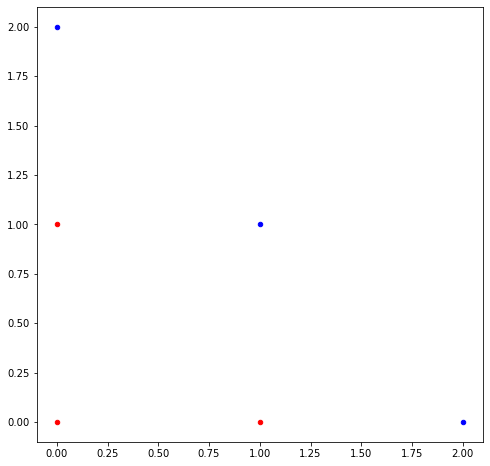

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(x1_min-0.1, x1_max+0.1)
plt.ylim(x2_min-0.1, x2_max+0.1)

ax.scatter(X_tr[:,0], X_tr[:,1], s=1)

for i in range(len(y_tr)):
    if y_tr[i] < 0.1:
        ax.scatter(X_tr[i,0], X_tr[i,1], s=20, c="red")
    else:
        ax.scatter(X_tr[i,0], X_tr[i,1], s=20, c="blue")

plt.show()

In [9]:
n = X_tr.shape[0]
d = X_tr.shape[1]
y = y_tr
one = np.ones((n,1))

X = np.concatenate((one, X_tr), axis=1)
X

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 2., 0.],
       [1., 1., 1.],
       [1., 0., 2.]])

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
# Funcion Objetivo J
def J(theta, X, y):                      # theta:(d+1,1), X: (n,d+1), y:(n,1)   donde 'n' son training samples
    h = sigmoid(X.dot(theta))        # X:(n,d+1), theta:(d+1,1) => h :(n,1) 
    f_obj = -((y.T).dot(np.log(h))+(1 - y.T).dot(np.log(1 - h)))/n   # funcion de costos 
    return f_obj[0,0]  

# gradiente de la Funcion Objetivo J
def gradient(theta, X, y):             # theta:(d+1,1), X: (n,d+1), y:(n,1)
    return (X.T).dot(sigmoid(X.dot(theta))-y)/n # dxn(nxd dx1 - nx1)

In [12]:
def gradient_descent(step, iter, X, y):
    d = X.shape[1]
    theta = np.zeros((d,1))
    costs = np.zeros(iter + 1)
    costs[0] = J(theta, X, y)
    for i in range(iter):
        theta = theta - step * gradient(theta, X, y)
        costs[i+1] = J(theta, X, y)
    return theta, costs

In [13]:
step = 0.1
iter = 1000
theta, costs = gradient_descent(step, iter, X, y)
print(theta)
print(costs[iter])
print(theta[1,0])

[[-4.49876865]
 [ 3.29910145]
 [ 3.29910145]]
0.1474206813000016
3.299101445766743


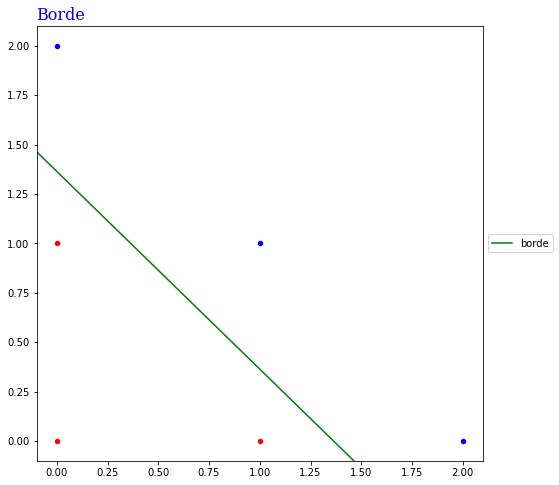

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(x1_min-0.1, x1_max+0.1)
plt.ylim(x2_min-0.1, x2_max+0.1)

x = np.linspace(x1_min-0.1, x1_max+0.1, 10)
y_x = -theta[0,0]/theta[2,0] - (theta[1,0]/theta[2,0])*x

ax.scatter(X_tr[:,0], X_tr[:,1], s=1)

for i in range(len(y_tr)):
    if y_tr[i] < 0.1:
        ax.scatter(X_tr[i,0], X_tr[i,1], s=20, c="red")
    else:
        ax.scatter(X_tr[i,0], X_tr[i,1], s=20, c="blue")

ax.set_title("Borde", loc='left', fontsize=16, fontname='serif', color="blue")

ax.plot(x, y_x, color="green", label="borde")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

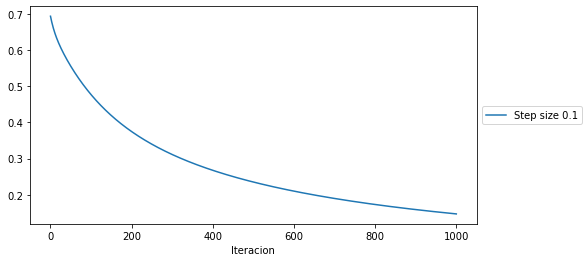

In [15]:
plt.figure(figsize=(8,4))
x_gd = np.linspace(0, iter, iter + 1)

plt.plot(x_gd, costs, label = "Step size 0.1")

plt.xlabel("Iteracion")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [16]:
# Otro ejemplo

num = 50
x1 = np.random.normal(0,1, size=(num,2))
y1 = np.ones((num,1))
x0 = np.random.normal(1,1, size=(num,2))
y0 = np.zeros((num,1))
X = np.concatenate((x1,x0), axis = 0)
y = np.concatenate((y1,y0), axis = 0)


num = y.shape[0]
one = np.ones((num,1))

X = np.concatenate((one, X), axis=1)
XT = X.T

In [17]:
x1_min = np.min(X[:,1])
x1_max = np.max(X[:,1])
x2_min = np.min(X[:,2])
x2_max = np.max(X[:,2])

print("x1_min = ", x1_min)
print("x1_max = ", x1_max)
print("x2_min = ", x2_min)
print("x2_max = ", x2_max)

x1_min =  -1.6029399970750133
x1_max =  3.350693508347695
x2_min =  -2.5125049325370865
x2_max =  3.013493233027585


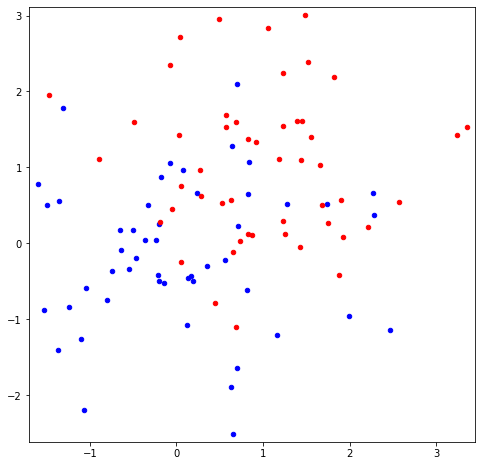

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(x1_min-0.1, x1_max+0.1)
plt.ylim(x2_min-0.1, x2_max+0.1)

ax.scatter(X[:,1], X[:,2], s=1)

for i in range(num):
    if y[i] < 0.1:
        ax.scatter(X[i,1], X[i,2], s=20, c="red")
    else:
        ax.scatter(X[i,1], X[i,2], s=20, c="blue")

plt.show()

In [19]:
step = 0.1
iter = 10000
theta, costs = gradient_descent(step, iter, X, y)
print(theta)
print(costs[iter])

[[ 1.0302041 ]
 [-0.94142486]
 [-1.28209252]]
7.701726063783092


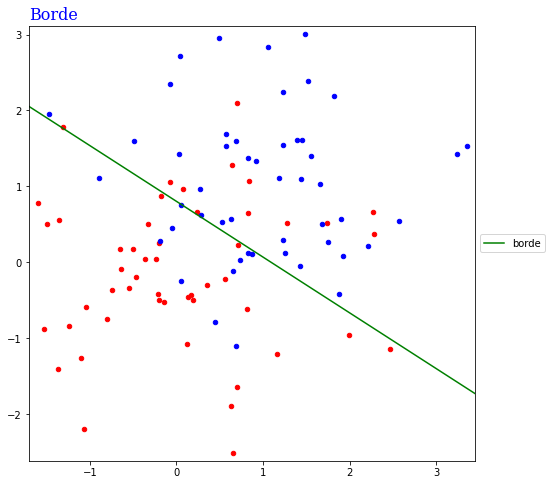

In [20]:
fig, ax = plt.subplots(figsize=(8,8))


plt.xlim(x1_min-0.1, x1_max+0.1)
plt.ylim(x2_min-0.1, x2_max+0.1)

x = np.linspace(x1_min-0.1, x1_max+0.1, num)
y_x = -theta[0,0]/theta[2,0] - (theta[1,0]/theta[2,0])*x

ax.scatter(X[:,1], X[:,2], s=1)

for i in range(num):
    if y[i] > 0.1:
        ax.scatter(X[i,1], X[i,2], s=20, c="red")
    else:
        ax.scatter(X[i,1], X[i,2], s=20, c="blue")

ax.set_title("Borde", loc='left', fontsize=16, fontname='serif', color="blue")

ax.plot(x, y_x, color="green", label="borde")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

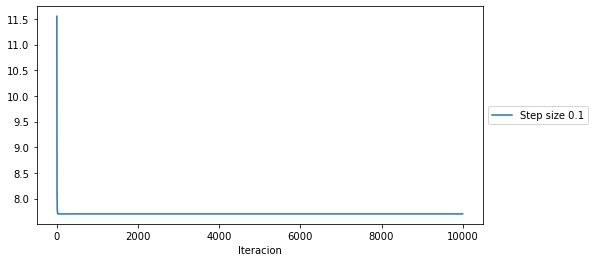

In [21]:
plt.figure(figsize=(8,4))
x_gd = np.linspace(0, iter, iter + 1)

plt.plot(x_gd, costs, label = "Step size 0.1")

plt.xlabel("Iteracion")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

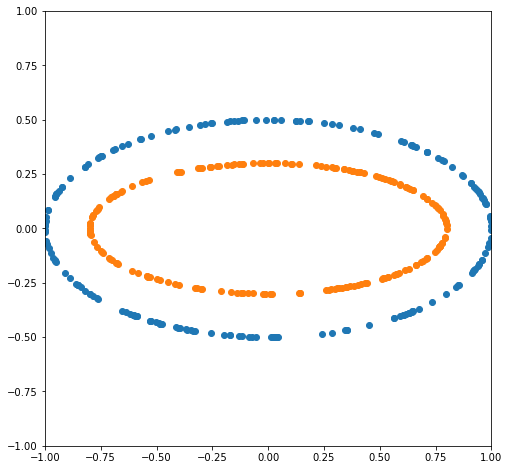

In [22]:
n=200
sigma_x1 = 1
sigma_x2 = 1

r5 = 1
r6 = 0.5
r7 = 0.8
r8 = 0.3



x1 = sigma_x1*np.random.randn(n)
x2 = sigma_x2*np.random.randn(n) # categoria 0 (naranja)

x3 = sigma_x1*np.random.randn(n)
x4 = sigma_x2*np.random.randn(n) # cateogria 1 (azules)

# normalizamos los grupos de puntos

x5 = r5*x1/np.sqrt(x1**2 + x2**2)  
x6 = r6*x2/np.sqrt(x1**2 + x2**2)

x7 = r7*x3/np.sqrt(x3**2 + x4**2)
x8 = r8*x4/np.sqrt(x3**2 + x4**2)


fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(-1, 1)
plt.ylim(-1, 1)

ax.scatter(x5, x6)
ax.scatter(x7, x8)


plt.show()

In [23]:
x5 = x5.reshape(n,1) # Coordenadas X de los puntos naranjas
x5_2 = x5**2  # término x^2
x6 = x6.reshape(n,1) # Coordenadas Y de los puntos naranjas
x6_2 = x6**2  # término y^2
x56 = x5*x6   # término x·y
x7 = x7.reshape(n,1)  # Coordenadas X de los puntos azules
x7_2 = x7**2
x8 = x8.reshape(n,1) # Coordenadas Y de los puntos azules
x8_2 = x8**2
x78 = x7*x8 


X56 = np.concatenate((x5,x6,x5_2,x6_2,x56), axis = 1)  # Concatenamos unos arriba y otros abajo, quedan el doble de puntos
X78 = np.concatenate((x7,x8,x7_2,x8_2,x78), axis = 1)
X5678 = np.concatenate((X56, X78), axis = 0) 
y1 = np.ones((n,1))  # les asignamos las labels (1)
y0 = np.zeros((n,1)) # labels cero (0)
y = np.concatenate((y1,y0), axis = 0)

n_tot = y.shape[0]

one = np.ones((n_tot, 1))

X = np.concatenate((one, X5678), axis = 1)
y.shape

(400, 1)

In [30]:
step = 0.1
iter = 10000
theta, costs = gradient_descent(step, iter, X, y)
print(theta)
print(costs[iter])

[[-5.41253091]
 [-0.06534594]
 [-0.21032819]
 [ 7.21671848]
 [28.0234223 ]
 [ 0.51267865]]
0.3443662911962462


In [31]:
costs.shape

(10001,)

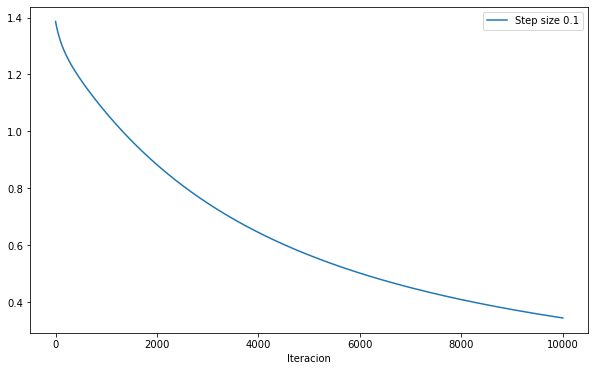

In [35]:
plt.figure(figsize=(10,6))
x_gd = np.linspace(0, iter, iter + 1)

plt.plot(x_gd, costs, label='Step size 0.1')

plt.xlabel('Iteracion')
plt.legend()
plt.show()

No handles with labels found to put in legend.


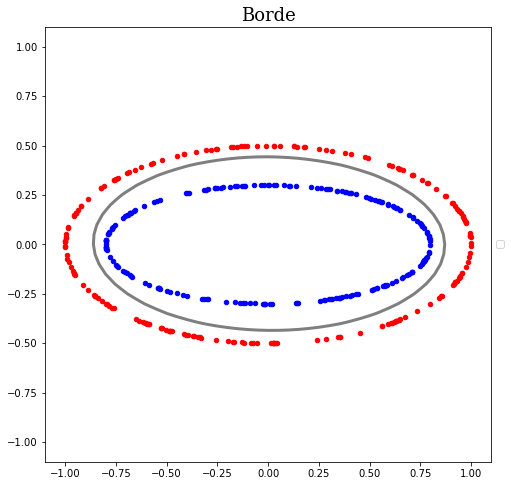

In [45]:
fig, ax = plt.subplots(figsize=(8,8))


plt.xlim(-1-0.1, 1+0.1)
plt.ylim(-1-0.1, 1+0.1)



ax.scatter(X[:,1], X[:,2], s=1)

for i in range(n_tot):
    if y[i] > 0.1:
        ax.scatter(X[i,1], X[i,2], s=20, c="red")
    else:
        ax.scatter(X[i,1], X[i,2], s=20, c="blue")

ax.set_title("Borde", loc='center', fontsize=18, fontname='serif', color="black")


X1 = np.arange(-1.0, 1.0, 0.05)
X2 = np.arange(-1.0, 1.0, 0.05)

x1, x2 = np.meshgrid(X1,X2)
equation = theta[0,0] + theta[1,0]*x1 + theta[2,0]*x2 + theta[3,0]*x1**2 + theta[4,0] *x2**2 + theta[5,0]*x1*x2
CS = ax.contour(x1,x2,equation,[0], alpha=0.5, linewidths=3, linestyles = 'solid', colors='black')



ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Cómo se puede observar, la distribución de los puntos fue clasificada correctamente con nuestro modelo que incluye términos no lineales, como pueden ser los parámetros al cuadrado y el producto de estos. Más especificamente teniamos $X^2 ; Y^2 ; X\cdot Y$.


Dentro de las alternativas disponibles para abordar este problema, se podría usar también de la libreria Scikit learn el modelo LogisticRegression.

```python
from sklearn.linear_model import LogisticRegression
```

del cual el objeto LogisticRegression cuenta con diversos algoritmos de optimización disponibles y parámetros que permiten calibrar el modelo para que ajuste bien al dataset en cuestión.